In [7]:
import pandas as pd 
transactions = pd.read_csv("./retail/transactions.csv" , parse_dates=["date"])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


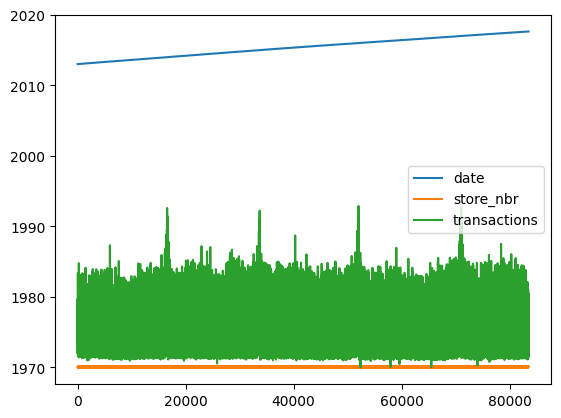

In [9]:
transactions.plot();

<Axes: xlabel='date'>

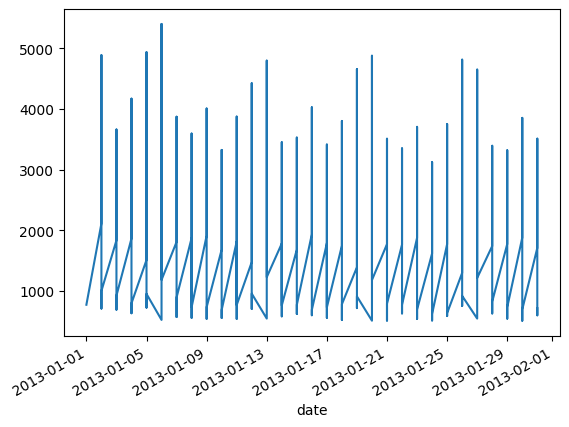

In [11]:
transactions.set_index("date").loc["2013-01","transactions"].plot()

<Axes: xlabel='date'>

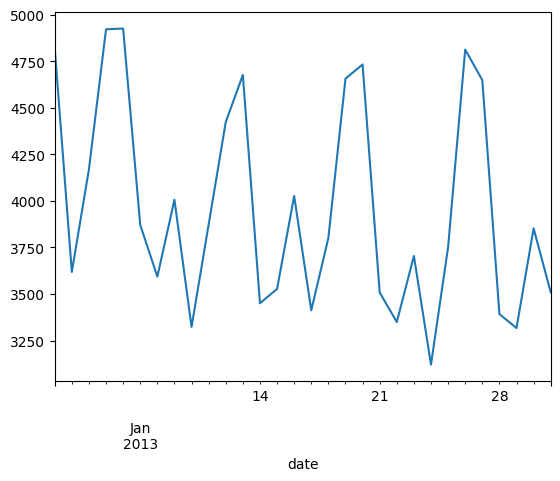

In [12]:
transactions.query("store_nbr == 44").set_index("date").loc["2013-01","transactions"].plot()

In [14]:
transactions_44 = transactions.loc[transactions["store_nbr"]==44,["date","transactions"]]
transactions_44.head()

,date,transactions
38,2013-01-02,4821
84,2013-01-03,3618
130,2013-01-04,4169
176,2013-01-05,4921
222,2013-01-06,4925


<Axes: xlabel='date'>

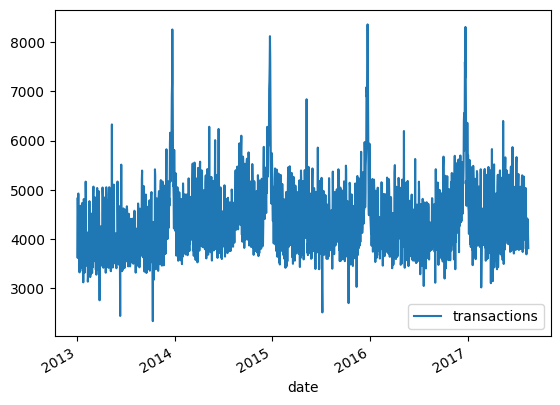

In [17]:
transactions_44.set_index("date").plot()

<Axes: xlabel='date'>

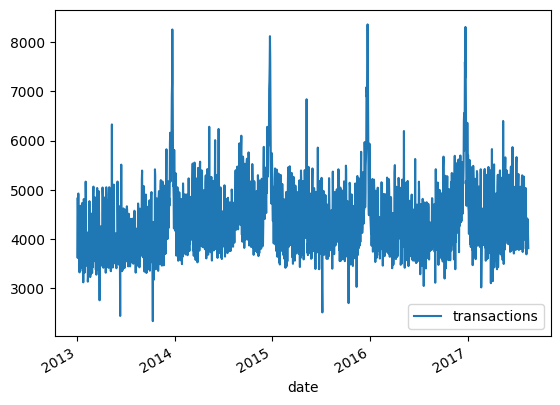

In [18]:
transactions_44.plot(x="date", y = "transactions")

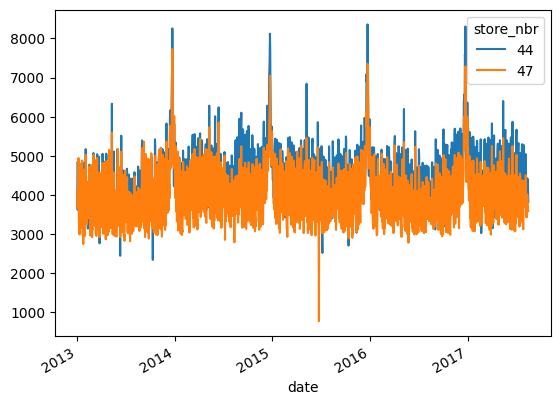

In [22]:
(
    transactions
    .query("store_nbr in [44,47]")
    .pivot_table(index="date", columns="store_nbr")
    .droplevel(0,axis=1)
    .plot()
);

### Exercise 1 
simple line chart

In [24]:
oil = pd.read_csv("./retail/oil.csv")

oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


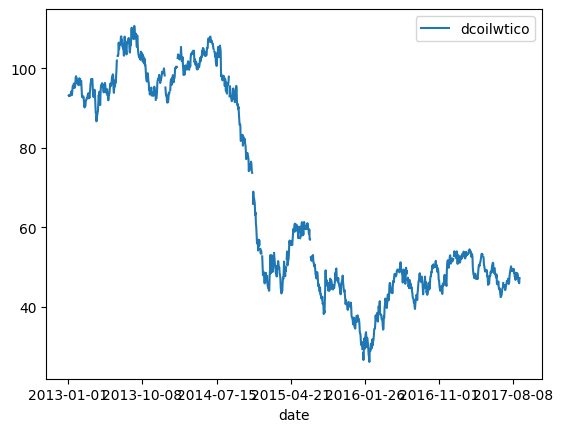

In [27]:
oil.set_index("date").plot();

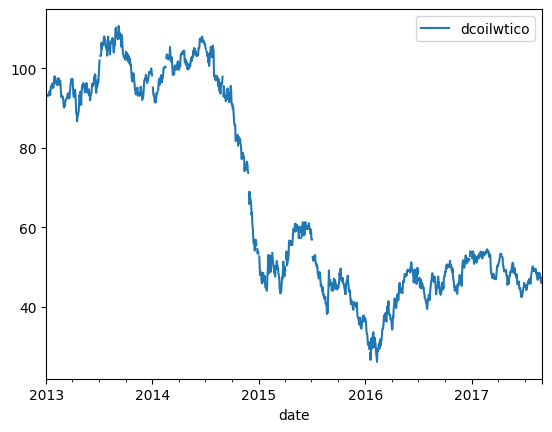

In [29]:
oil.astype({"date":"datetime64[ns]"}).plot(x="date");

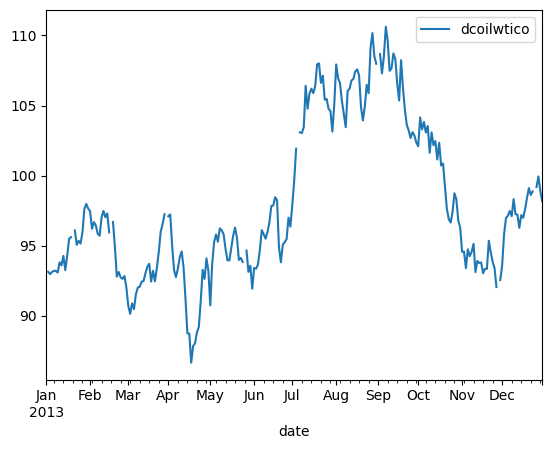

In [30]:
oil.astype({"date":"datetime64[ns]"}).set_index("date").loc["2013"].plot();

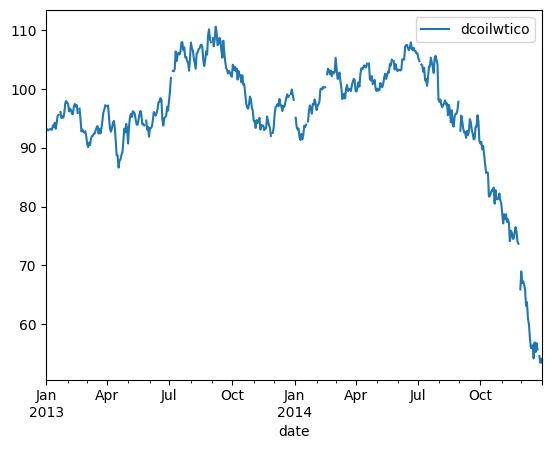

In [31]:
oil.astype({"date":"datetime64[ns]"}).set_index("date").loc["2013":"2014"].plot();

### formatting 

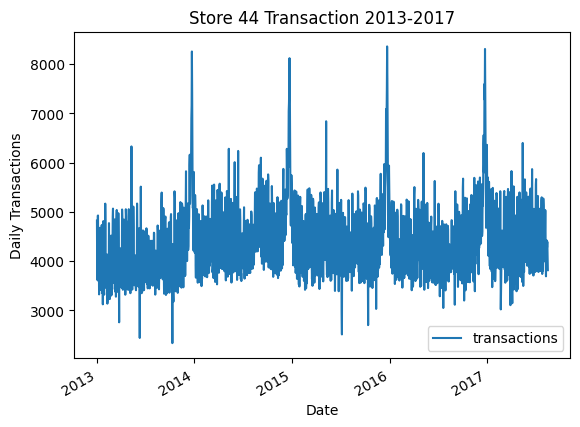

In [33]:
transactions_44.set_index('date').plot(
      title="Store 44 Transaction 2013-2017",
      xlabel='Date',
      ylabel="Daily Transactions"
   );

### colors

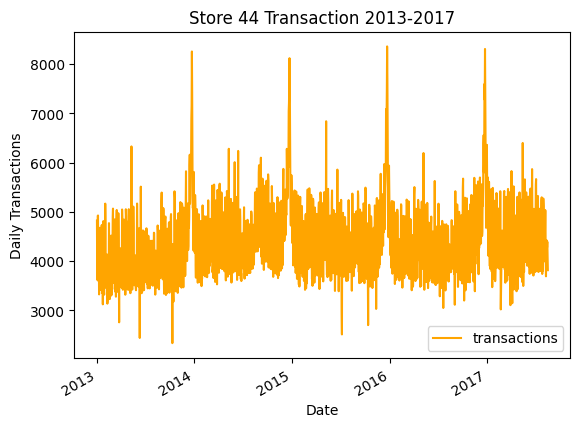

In [35]:
transactions_44.set_index('date').plot(
      title="Store 44 Transaction 2013-2017",
      xlabel='Date',
      ylabel="Daily Transactions",
      c='orange' # color = 'black'
   );

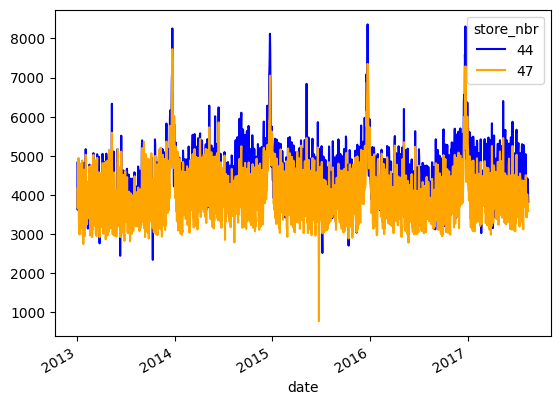

In [37]:
(transactions
 .query("store_nbr in [44,47]")
  .pivot(index="date",columns="store_nbr")
  .droplevel(0, axis=1)
  .plot(color=["blue","orange"],
   ));

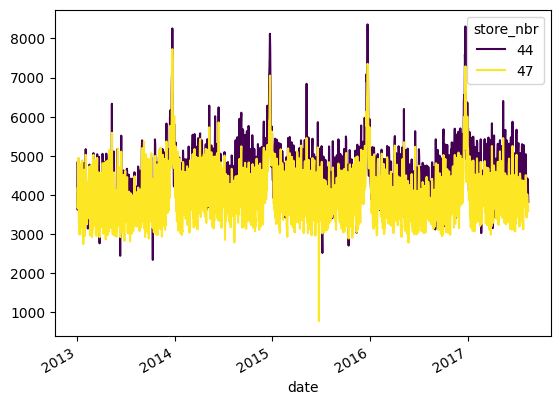

In [44]:
(transactions
 .query("store_nbr in [44,47]")
  .pivot(index="date",columns="store_nbr")
  .droplevel(0, axis=1)
  .plot(
      cmap='viridis',
   ));

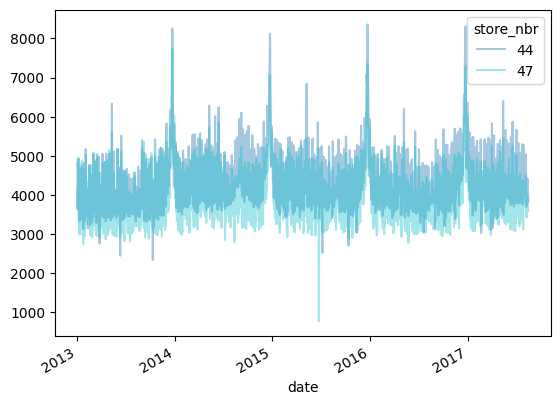

In [47]:
(transactions
 .query("store_nbr in [44,47]")
  .pivot(index="date",columns="store_nbr")
  .droplevel(0, axis=1)
  .plot(
      cmap='tab10',
      alpha=0.4 # shows transparency
   ));

### line style 

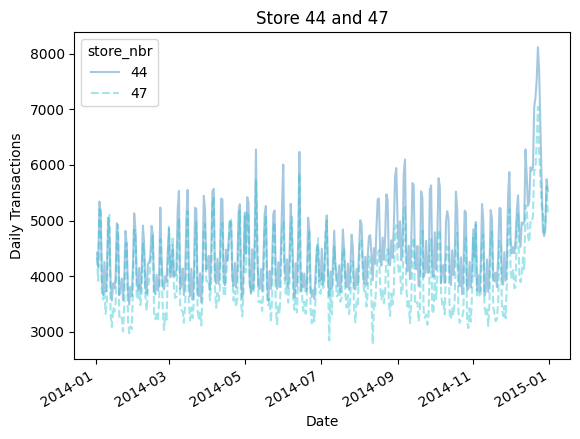

In [50]:
(transactions
 .query("store_nbr in [44,47] and date.dt.year == 2014" )
  .pivot(index="date",columns="store_nbr")
  .droplevel(0, axis=1)
  .plot(
      title = "Store 44 and 47",
      xlabel="Date",
      ylabel="Daily Transactions",
      cmap='tab10',
      alpha=0.4 ,# shows transparency,
      style=["-","--"]
   ));

### chart legends

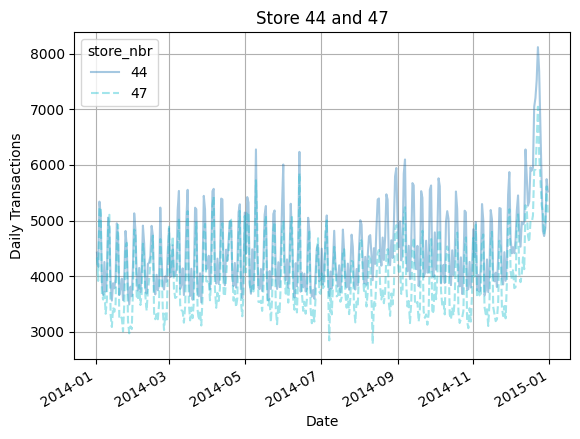

In [51]:
(transactions
 .query("store_nbr in [44,47] and date.dt.year == 2014" )
  .pivot(index="date",columns="store_nbr")
  .droplevel(0, axis=1)
  .plot(
      title = "Store 44 and 47",
      xlabel="Date",
      ylabel="Daily Transactions",
      cmap='tab10',
      alpha=0.4 ,# shows transparency,
      style=["-","--"],
      grid = True
   ));

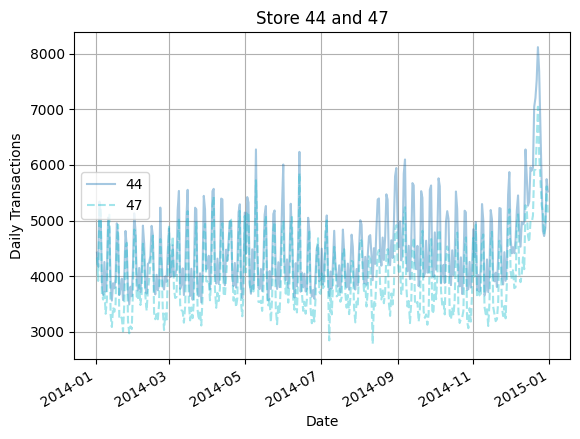

In [52]:
(transactions
 .query("store_nbr in [44,47] and date.dt.year == 2014" )
  .pivot(index="date",columns="store_nbr")
  .droplevel(0, axis=1)
  .plot(
      title = "Store 44 and 47",
      xlabel="Date",
      ylabel="Daily Transactions",
      cmap='tab10',
      alpha=0.4 ,# shows transparency,
      style=["-","--"],
      grid = True
   )).legend(loc="center left");

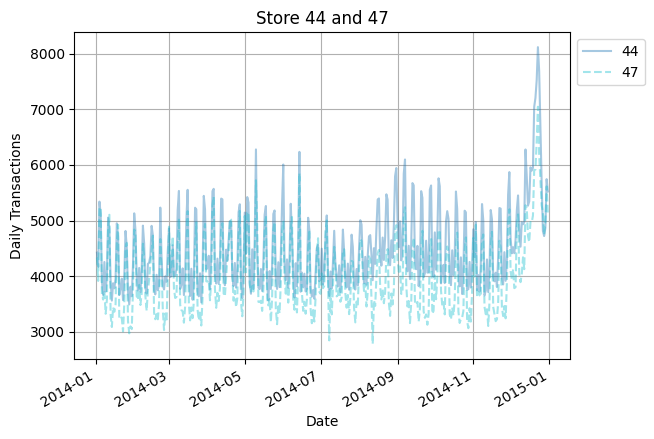

In [58]:
(transactions
 .query("store_nbr in [44,47] and date.dt.year == 2014" )
  .pivot(index="date",columns="store_nbr")
  .droplevel(0, axis=1)
  .plot(
      title = "Store 44 and 47",
      xlabel="Date",
      ylabel="Daily Transactions",
      cmap='tab10',
      alpha=0.4 ,# shows transparency,
      style=["-","--"],
      grid = True
   )).legend(bbox_to_anchor=(1,1));

### chart styles

<Axes: title={'center': 'Store 44 and 47'}, xlabel='Date', ylabel='Daily Transactions'>

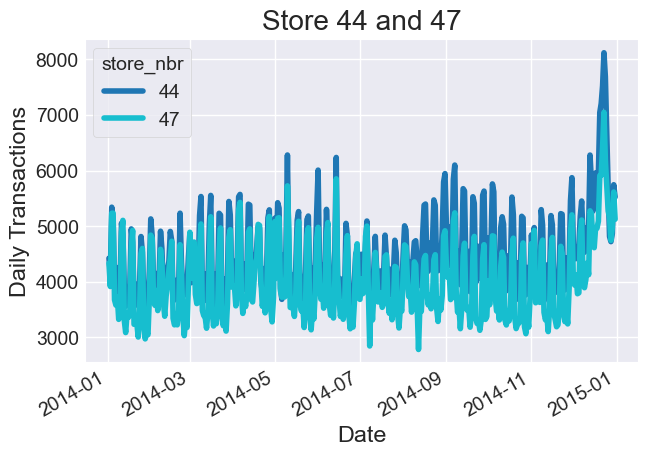

In [62]:
import seaborn as sns

sns.set_style("darkgrid")

(transactions
 .query("store_nbr in [44,47] and date.dt.year == 2014" )
  .pivot(index="date",columns="store_nbr")
  .droplevel(0, axis=1)
  .plot(
      title = "Store 44 and 47",
      xlabel="Date",
      ylabel="Daily Transactions",
      cmap='tab10',
      # alpha=0.4 ,# shows transparency,
      # style=["-","--"],
      # grid = True
   ))#.legend(bbox_to_anchor=(1,1));

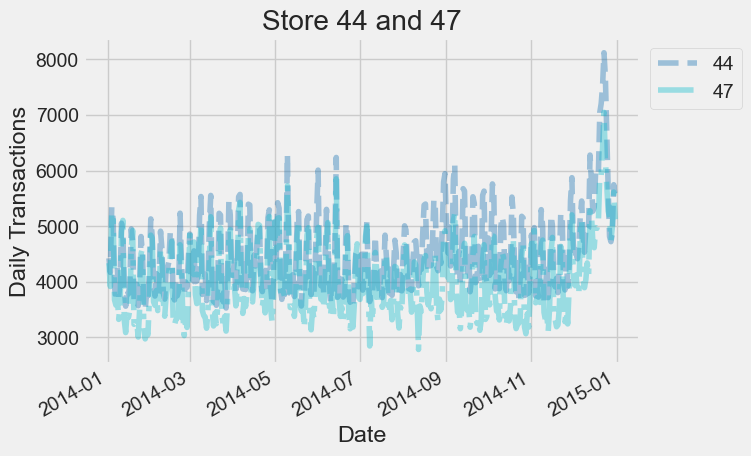

In [61]:
import matplotlib 

matplotlib.style.use("fivethirtyeight")

(transactions
 .query("store_nbr in [44,47] and date.dt.year == 2014" )
  .pivot(index="date",columns="store_nbr")
  .droplevel(0, axis=1)
  .plot(
      title = "Store 44 and 47",
      xlabel="Date",
      ylabel="Daily Transactions",
      cmap='tab10',
      alpha=0.4 ,# shows transparency,
      style=["--","-."],
      grid = True
   )).legend(bbox_to_anchor=(1,1));

### Exercise 2 style the chart

In [75]:
oil = oil.rename(columns={"dcoilwtico":"Oil Price"})

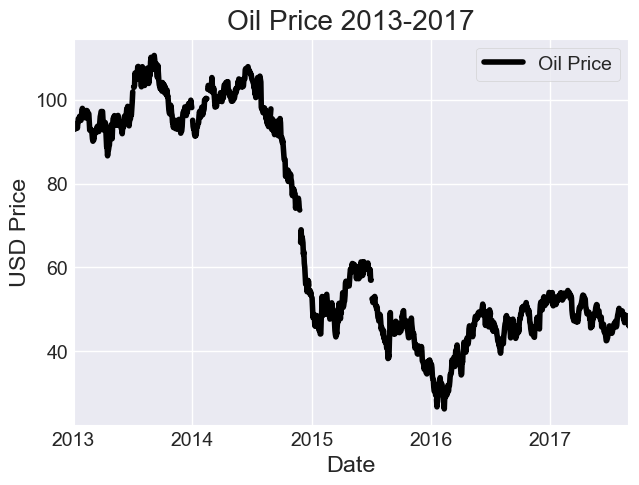

In [80]:
import seaborn as sns

sns.set_style("darkgrid")

oil.set_index(oil["date"].astype("datetime64[ns]")).plot(
    title = "Oil Price 2013-2017",
    xlabel = "Date",
    ylabel="USD Price",
    color="black"
);

### subplots

array([[<Axes: xlabel='Date', ylabel='Daily Transactions'>,
        <Axes: xlabel='Date', ylabel='Daily Transactions'>]], dtype=object)

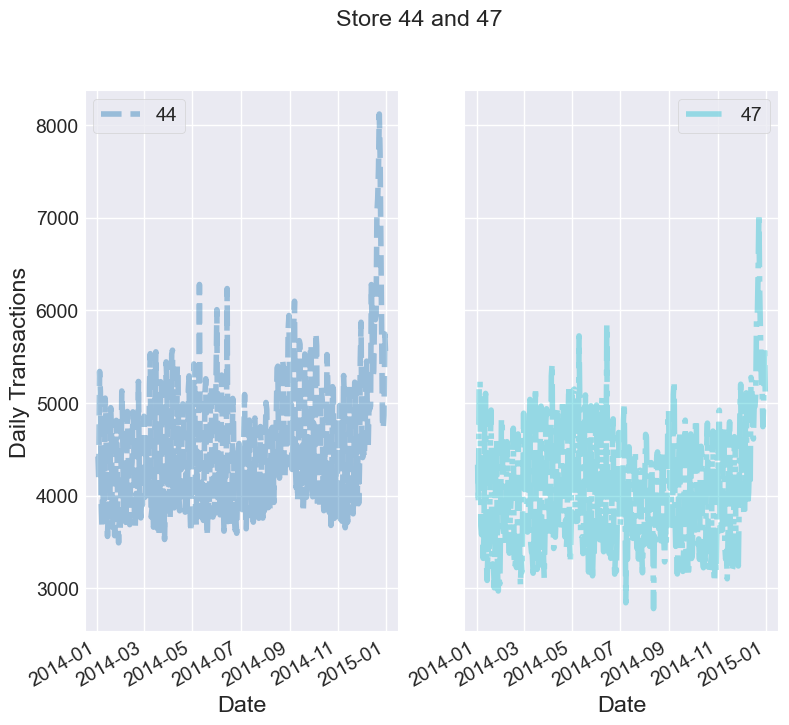

In [91]:
(transactions
 .query("store_nbr in [44,47] and date.dt.year == 2014" )
  .pivot(index="date",columns="store_nbr")
  .droplevel(0, axis=1)
  .plot(
      title = "Store 44 and 47",
      xlabel="Date",
      ylabel="Daily Transactions",
      cmap='tab10',
      alpha=0.4 ,# shows transparency,
      style=["--","-."],
      grid = True,
      subplots=True,
      layout=(1,2),
      sharey=True,
      figsize=(8,8)
   ))#.legend(bbox_to_anchor=(1,1));

### Exercise 3 subplots

In [110]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [112]:
(
    transactions
    .query("store_nbr in [1,2,3,4]")
)

,date,store_nbr,transactions
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
47,2013-01-03,1,1833
...,...,...,...
83383,2017-08-14,4,1285
83434,2017-08-15,1,1693
83435,2017-08-15,2,1737
83436,2017-08-15,3,2956


In [117]:
transactions.loc[transactions["store_nbr"].isin([1,2,3,4])]

,date,store_nbr,transactions
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
47,2013-01-03,1,1833
...,...,...,...
83383,2017-08-14,4,1285
83434,2017-08-15,1,1693
83435,2017-08-15,2,1737
83436,2017-08-15,3,2956


In [114]:
(
    transactions
    .query("store_nbr in [1,2,3,4]")
    .pivot(index="date",columns="store_nbr")
    .droplevel(0,axis=1)
)

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


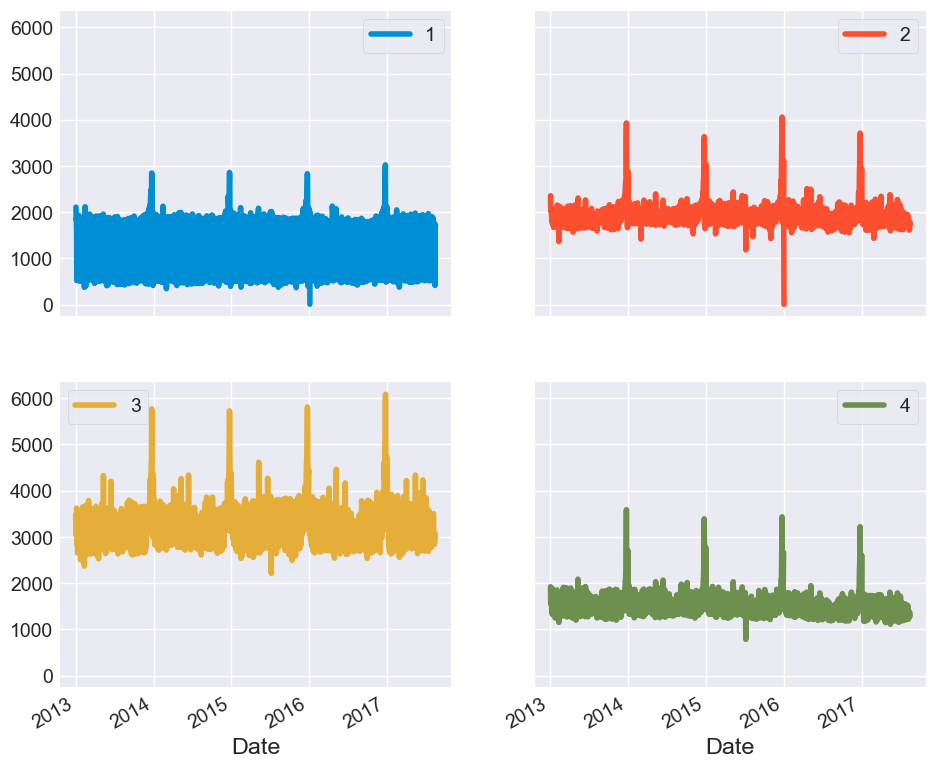

In [116]:
(transactions
 .query("store_nbr in [1,2,3,4]" )
  .pivot(index="date",columns="store_nbr")
  .droplevel(0, axis=1)
  .plot(
      xlabel="Date",
      subplots=True,
      layout=(2,2),
      sharey=True,
      grid = True,
      figsize=(10,10)
   ));